Importing Data:

1. Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 1000
rows of the dataframe (these must be the same for all the students). The remaining rows will be the
training + validation set, with training : validation ratio of 80% : 20%. Determine:

A. number of rows in training, validation and test sets, along with the structure, datatypes and
value counts of the dataframes.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('House_Rent_Dataset.csv')
np.random.seed(42)
shuffled_data = df.sample(frac=1).reset_index(drop=True)

test_set = shuffled_data.tail(1000)

train_val_set = shuffled_data.iloc[:-1000]
train_size = int(0.8 * len(train_val_set))
val_size = len(train_val_set) - train_size

train_set = train_val_set.iloc[:train_size]
val_set = train_val_set.iloc[train_size:]

print("Rows in Test Set:", len(test_set))
print(test_set.info())
print("Rows in Train Set:", len(train_set))
print(train_set.info())
print("Rows in Validation Set:", len(val_set))
print(val_set.info())

Rows in Test Set: 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 3746 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          1000 non-null   object
 1   BHK                1000 non-null   int64 
 2   Rent               1000 non-null   int64 
 3   Size               1000 non-null   int64 
 4   Floor              1000 non-null   object
 5   Area Type          1000 non-null   object
 6   Area Locality      1000 non-null   object
 7   City               1000 non-null   object
 8   Furnishing Status  1000 non-null   object
 9   Tenant Preferred   1000 non-null   object
 10  Bathroom           1000 non-null   int64 
 11  Point of Contact   1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB
None
Rows in Train Set: 2996
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 12 columns):
 #   Column           

Data Cleaning:

1. Analyse the data and identify which columns are not relevant for house rent prediction task. Drop
those columns from the dataframes.
2. Check for missing values and logically impute the dataset.
3. Identify any categorical valued columns (non-numeric) and convert them to numeric.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('House_Rent_Dataset.csv')

columns_to_drop = ['Posted On', 'Tenant Preferred', 'Point of Contact']
df.drop(columns=columns_to_drop, inplace=True)
print(df)

      BHK   Rent  Size            Floor    Area Type  \
0       2  10000  1100  Ground out of 2   Super Area   
1       2  20000   800       1 out of 3   Super Area   
2       2  17000  1000       1 out of 3   Super Area   
3       2  10000   800       1 out of 2   Super Area   
4       2   7500   850       1 out of 2  Carpet Area   
...   ...    ...   ...              ...          ...   
4741    2  15000  1000       3 out of 5  Carpet Area   
4742    3  29000  2000       1 out of 4   Super Area   
4743    3  35000  1750       3 out of 5  Carpet Area   
4744    3  45000  1500     23 out of 34  Carpet Area   
4745    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Bathroom  
0                       Bandel    Kolkata       Unfurnished         2  
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished         1  
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished         1  
3                  Dumdum Park    Kolka

In [3]:
missing_values = df.isnull().sum()
print("Missing values in each column:", missing_values)

# There are no missing values in any columns, hence no imputations required.

Missing values in each column: BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Bathroom             0
dtype: int64


Exploratory Analysis (On training set):

1. Plot the house rents against the dependent variable of “size”. See if there is a uniform linear trend
between the dependent and independent variables. Make accurate axis and legend. Save the plot in a
png file.
2. Find average rent prices in different cities and report which city has the highest average rent.

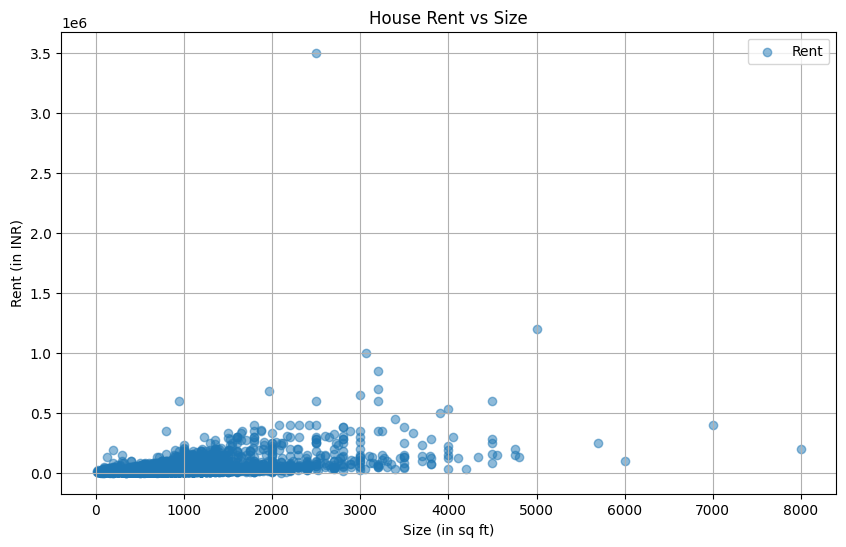

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rent'], alpha=0.5)
plt.title('House Rent vs Size')
plt.xlabel('Size (in sq ft)')
plt.ylabel('Rent (in INR)')
plt.legend(['Rent'])
plt.grid(True)
plt.savefig('house_rent_vs_size.png')
plt.show()

In [8]:
average_rent_per_city = train_val_set.groupby('City')['Rent'].mean()
highest_avg_rent_city = average_rent_per_city.idxmax()
highest_avg_rent = average_rent_per_city.max()

print("Average Rent Prices in Different Cities:")
print(average_rent_per_city)
print("\nCity with the Highest Average Rent:")
print(f"{highest_avg_rent_city} with an average rent of {highest_avg_rent}")

Average Rent Prices in Different Cities:
City
Bangalore    26239.562044
Chennai      21913.461871
Delhi        30329.501085
Hyderabad    20398.962428
Kolkata      11679.932558
Mumbai       84236.537676
Name: Rent, dtype: float64

City with the Highest Average Rent:
Mumbai with an average rent of 84236.53767560664


Regression:

1. Train a linear regression model on the training set partition by taking only one dependent variable of
“size”. Calculate the error on the validation set.
2. Plot the model predictions of rent values alongside the actual rent values taken for the validation set.
Show the legend, axes and color-coded predictions and ground truth for differentiating.
3. Create a function for calculating the RMSE values for the predictions Vs the actual ground truth rent
values. RMSE = SQRT( Σ ( (h(xi) - yi)2)/N ), Here h(x) are the prediction values, N are the number of rows.
Do not use inbuilt function to calculate RMSE.
4. Try to improve accuracy (on validation set) by considering more features (or higher order features)
and retraining.
5. Make predictions on the test set by taking 3 of your best models. Report these 3 accuracy values.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train = train_set[['Size']]
y_train = train_set['Rent']
X_val = val_set[['Size']]
y_val = val_set['Rent']

model = LinearRegression()
model.fit(x_train, y_train)

y_val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)

print("Validation RMSE:", rmse)

Validation RMSE: 54185.84969101545


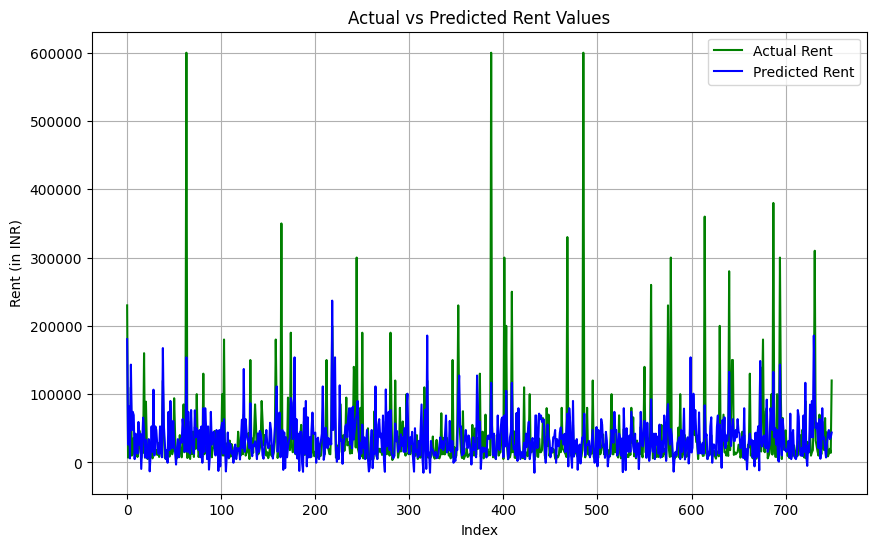

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual Rent', color='green')
plt.plot(y_val_pred, label='Predicted Rent', color='blue')
plt.title('Actual vs Predicted Rent Values')
plt.xlabel('Index')
plt.ylabel('Rent (in INR)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def calculate_rmse(predictions, actuals):
    n = len(predictions)
    squared_errors = (predictions - actuals) ** 2
    mse = np.sum(squared_errors) / n
    rmse = np.sqrt(mse)
    return rmse

rmse_value = calculate_rmse(y_val_pred, y_val)
print("Calculated RMSE:", rmse_value)

Calculated RMSE: 54185.84969101545


In [14]:
features = ['Size', 'BHK', 'Bathroom']
x_train_more_features = train_set[features]
X_val_more_features = val_set[features]

model_more_features = LinearRegression()
model_more_features.fit(x_train_more_features, y_train)

y_val_pred_more_features = model_more_features.predict(X_val_more_features)

mse_more_features = mean_squared_error(y_val, y_val_pred_more_features)
rmse_more_features = np.sqrt(mse_more_features)

print("Validation RMSE with more features:", rmse_more_features)

Validation RMSE with more features: 50487.88413920841
